<a href="https://colab.research.google.com/github/cristianosps/My_DataScience_Portfolio/blob/master/Analisando%20os%20Dados%20do%20Airbnb%20-%20Amsterdam%20-%20The%20Netherlands/Analisando_os_Dados_do_Airbnb_Amsterdam_The_Netherlands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

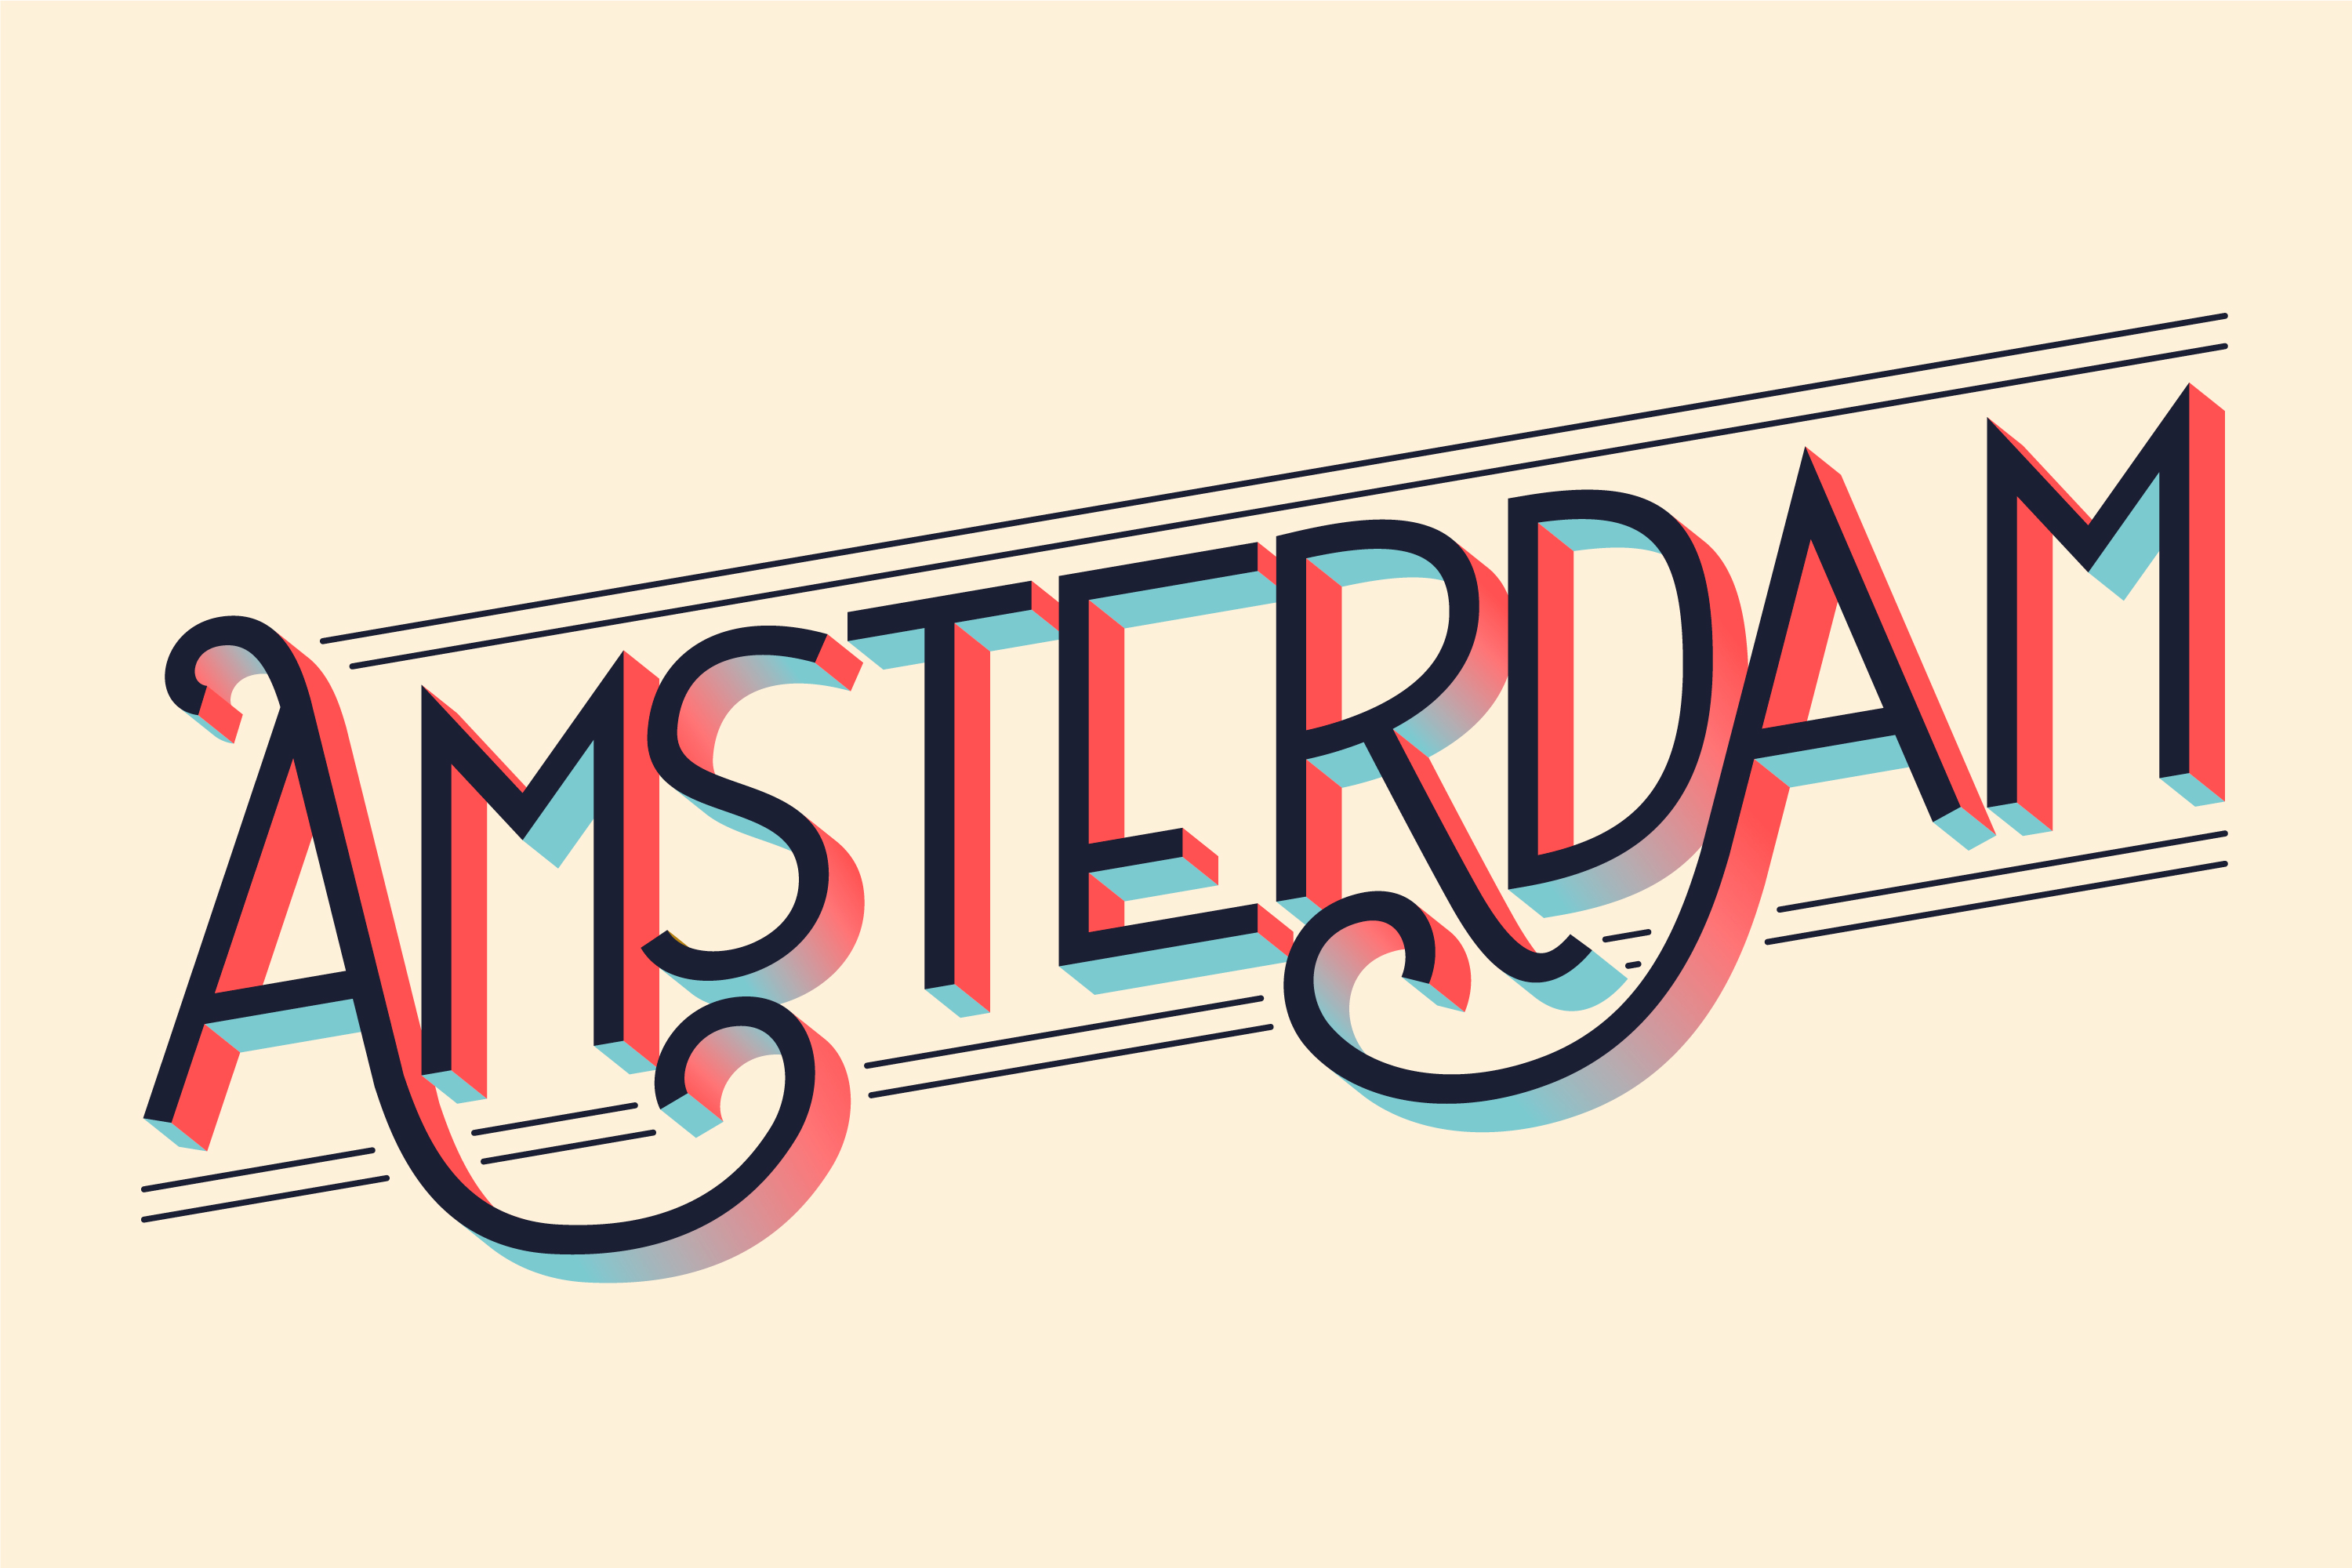

---

# Análise dos Dados do Airbnb - *Amsterdam, The Netherlands*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada no segundo semestre de 2008, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, em aproximadamente 190 países, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível obter uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de *Amsterdam, capital da Holanda*, e verificar quais insights podem ser extraídos a partir de dados brutos.**



---



## Obtenção dos Dados

Nesta análise referente ao serviço de hospedagens [Airbnb](https://www.airbnb.com.br/) para cidade de Amsterdam, capital da Holanda, foram utilizados dados de obtidos a partir do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

A análise exploratória dos dados será a partir do seguinte arquivo/ dataset:


*   `listings.csv` - *Summary information and metrics for listings in Amsterdam (good for visualisations)*. |09 September, 2020|

In [22]:
# Importar os pacotes necessários para construção do notebook.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [23]:
# Importar o arquivo/ dataset "listings.csv" e carregá-lo para um DataFrame.

df = pd.read_csv("https://raw.githubusercontent.com/cristianosps/My_DataScience_Portfolio/master/Analisando%20os%20Dados%20do%20Airbnb%20-%20Amsterdam%20-%20The%20Netherlands/data/listings.csv")

## Análise dos Dados

Nesta etapa realizamos o entendimento inicial dos dados e verificamos como estão estruturados ao serem carregados no DataFrame.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar conteúdo do nosso *dataset*, analisando as 5 primeiras e últimas entradas.

In [24]:
# Apresentar as 5 primeiras entradas do Dataset [Dados carregados no DataFrame sem alterações].

df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.99,1,125
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,216,1,340,2020-04-09,2.65,3,3
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.16,1,47
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,141,2,219,2020-07-25,2.07,1,188
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,334,2020-08-16,2.73,2,340


In [25]:
# Apresentar as 5 últimas entradas do Dataset [Dados carregados no DataFrame sem alterações].

df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18900,45324647,Andrea House,327652332,Caterina,NaN,Bijlmer-Oost,52.31778,4.97741,Private room,36,15,0,NaN,NaN,9,364
18901,45326415,Tweepersoons appartement in Amsterdam,16868499,Naomi,NaN,De Baarsjes - Oud-West,52.36183,4.85379,Entire home/apt,125,2,0,NaN,NaN,1,27
18902,45337746,Amsterdam Centre appt near damsquare,206916999,DavidJacob,NaN,Centrum-West,52.37147,4.89091,Entire home/apt,134,2,0,NaN,NaN,2,80
18903,45344216,Beautiful cozy new studio close to the water.,51382539,B,NaN,IJburg - Zeeburgereiland,52.37556,4.96597,Entire home/apt,72,2,0,NaN,NaN,1,0
18904,45347687,Nice room clean and easy to go to the centrum,366594197,Johanna,NaN,Bijlmer-Centrum,52.32553,4.94966,Private room,106,1,0,NaN,NaN,1,364


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [26]:
# Identificar as dimensões/ volume de dados do DataFrame.

print("Dimensões do Dataset Carregado\n")
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

Dimensões do Dataset Carregado

Entradas:	 18905
Variáveis:	 16


In [27]:
# Identificar o tipo de dado de cada variável do DataFrame.

print("Variáveis do DataFrame e seus respectivos Tipos\n")
display(df.dtypes)

Variáveis do DataFrame e seus respectivos Tipos



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Consultar variáveis com valores ausentes e calcular o percentual para cada uma no DataFrame. 

In [28]:
# Apresentar o percentual de valores ausentes para as variáveis do DataFrame [ordem decrescente].

print("Variáveis do DataFrame e o percentual de valores ausentes\n")
(((df.isnull().sum()/ df.shape[0]).sort_values(ascending=False))*100).apply(lambda x: "{:_.2f}%".format(x))

Variáveis do DataFrame e o percentual de valores ausentes



neighbourhood_group               100.00%
reviews_per_month                  12.04%
last_review                        12.04%
host_name                           0.30%
name                                0.17%
availability_365                    0.00%
calculated_host_listings_count      0.00%
number_of_reviews                   0.00%
minimum_nights                      0.00%
price                               0.00%
room_type                           0.00%
longitude                           0.00%
latitude                            0.00%
neighbourhood                       0.00%
host_id                             0.00%
id                                  0.00%
dtype: object

### **Q3. Qual o tipo de distribuição das variáveis?** 

Antes de apresentar a distribuição das variáveis numéricas a partir de **histograma**, iremos identificar possíveis **outliers** que possam distorcer a análise.

In [29]:
# Resumo de como estão distribuidos os valores referentes as variáveis numéricas do Dataframe que serão utlizadas na análise.

df[["price",	"minimum_nights",	"number_of_reviews",	"reviews_per_month",	"calculated_host_listings_count",	"availability_365"]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18905.000000,18905.000000,18905.000000,16628.000000,18905.000000,18905.000000
mean,167.807511,3.562126,24.825126,0.721036,2.586776,61.431949
std,495.086762,14.112992,54.314628,1.268922,8.782611,111.583088
min,5.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,95.000000,2.000000,2.000000,0.150000,1.000000,0.000000
50%,130.000000,2.000000,8.000000,0.350000,1.000000,0.000000
75%,184.000000,3.000000,23.000000,0.710000,1.000000,78.000000
max,20737.000000,1001.000000,854.000000,44.830000,86.000000,365.000000


A partir do resumo de como estão distribuidos os valores referentes as variáveis, logo acima, podemos notar que as variáveis ***price*** e ***minimum_nights*** para seu valor máximo ("max") estão com valores distorcidos que podem comprometer a análise.



*   Para a variável *price*, que representa o valor de uma diária referente ao imóvel disponível para aluguel, foi observado o valor máximo de 20.737, porém 75% dos imóveis têm o valor da diária de até 184.00;
*   Para a variável *minimum_nights*, que representa o número mínimo de noites para hospedagem no imóvel, tem o valor máximo de 1001, porém 75% dos hóspedes utilizam até 3 diárias ao se hospedarem na cidade.



Esses valores distorcidos demonstram a presença de *outiliers* para o dataset em questão e para uma análise mais coerente com a realidade serão efetuadas algumas transformações.


*PS: Os valores correspodentes ao preço de aluguel/ diária para os imóveis cadastrados devem ser considerados em moeda local.*

**Boxplot para a variável "price"**

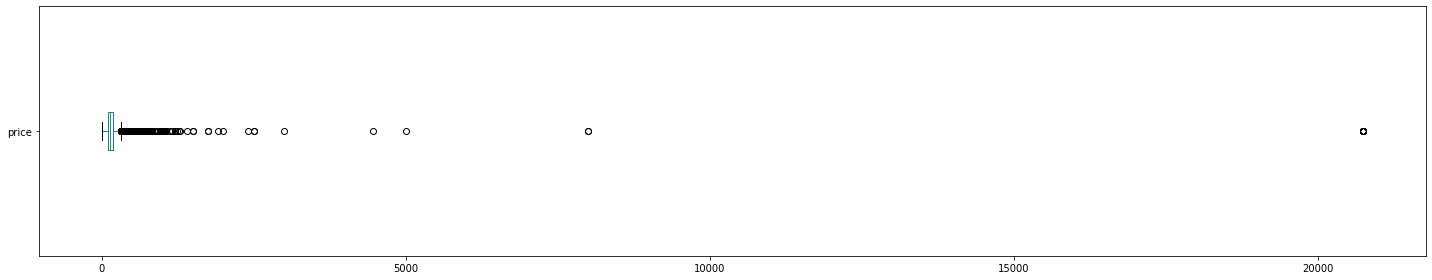


Número de imóveis ofertados com o valor da diária acima de $1000 [price > 1000]

> 40 imóveis encontrados dentre os 18905 ofertados na cidade;
> Referente a 0.21% dos imóveis.


In [30]:
# Visualizar distribuição da variável "price" no dataset.

df.price.plot(kind='box', vert=False, figsize=(20, 4))

plt.tight_layout()
plt.show();

# Verificar valor da diária para a variável "price" > 1000.

print("\nNúmero de imóveis ofertados com o valor da diária acima de $1000 [""price"" > 1000]\n")
print("> {} imóveis encontrados dentre os {} ofertados na cidade;".format(len(df[df.price > 1000]), df.shape[0]))
print("> Referente a {:.2f}% dos imóveis.".format((len(df[df.price > 1000])/df.shape[0])*100))

**Boxplot para a variável "minimum_nights"**

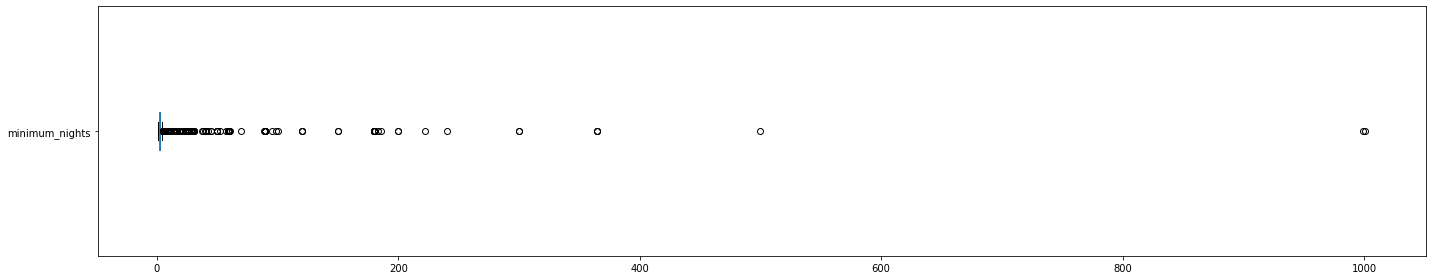


Número de imóveis ofertados com o mínimo de noites para se hospedar acima de 30 [minimum_nights > 30]

> 84 imóveis encontrados dentre os 18905 ofertados na cidade;
> Referente a 0.44% dos imóveis.


In [31]:
# Visualizar distribuição da variável "minimum_nights" no dataset.

df.minimum_nights.plot(kind='box', vert=False, figsize=(20, 4))

plt.tight_layout()
plt.show();


# Verificar valor do número mínimo de noites para a variável "minimum_nights" > 30.

print("\nNúmero de imóveis ofertados com o mínimo de noites para se hospedar acima de 30 [""minimum_nights"" > 30]\n")
print("> {} imóveis encontrados dentre os {} ofertados na cidade;".format(len(df[df.minimum_nights > 30]), df.shape[0]))
print("> Referente a {:.2f}% dos imóveis.".format((len(df[df.minimum_nights > 30])/df.shape[0])*100))

**Transformações necessárias para a análise**

Será realizada uma limpeza nos dados carregados no DataFrame utilizado para melhor organização/ entendimento dos dados e análise do serviço para os imóveis disponíveis para aluguel na cidade.

In [32]:
# Primeiramente, será realizada uma cópia do DataFrame original para outro, onde estarão os dados após transformações.

df_clean = df.copy()


# A coluna "neighbourhood_group" não será necessária, pois não se encontra preenchida com valores válidos ou que possam auxiliar na análise.

df_clean.drop("neighbourhood_group", axis=1, inplace=True)


# O critério utilizado para eliminar os outliers identificados nesta análise será a exclusão das linhas com "price" > 1000 e "minimum_nights" > 30.

df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

print("Limpeza dos dados concluída com sucesso.")

Limpeza dos dados concluída com sucesso.


**Plot do histograma com a distribuição das variáveis numéricas**

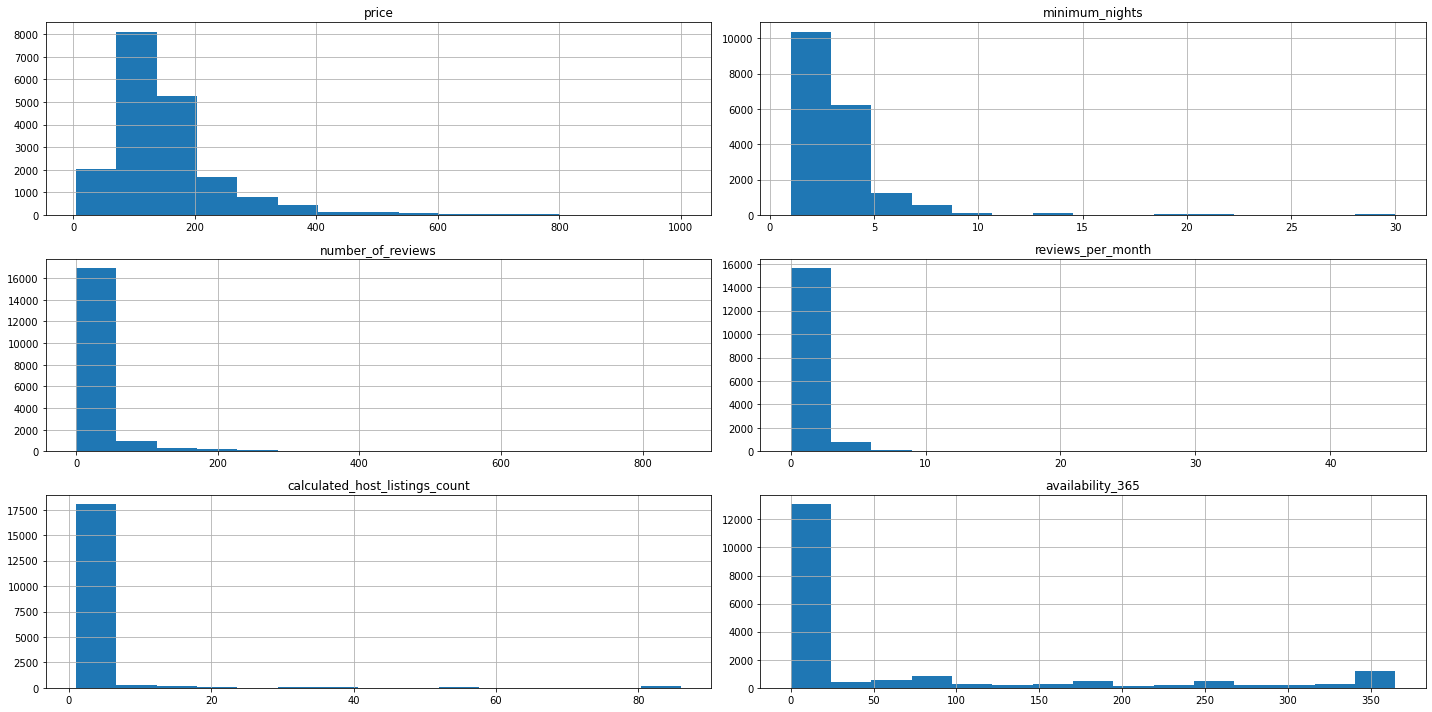

In [33]:
# Plotar o histograma das variáveis numéricas selecionadas do DataFrame para identificação/ obaservação da distribuição.

df_clean.hist(["price",	"minimum_nights",	"number_of_reviews",	"reviews_per_month",	"calculated_host_listings_count",	"availability_365"], bins=15, figsize=(20,10))
plt.tight_layout()
plt.show();

### **Q4. Qual a média dos preços de aluguel?**

In [34]:
# Apresentar a média da coluna "price", refente ao valor da diária para aluguel de imóvel na cidade.

print("Valor médio de uma diária para aluguel de imóvel na cidade: ${:.2f}".format(df_clean["price"].mean()))

Valor médio de uma diária para aluguel de imóvel na cidade: $153.60


### **Q5. Qual a correlação existente entre as variáveis?**

**Matriz de correlação**

In [35]:
# Criar uma matriz de correlação de acordo com as variáveis numéricas selecionadas.

matriz_correlacao = df_clean[["price",	"minimum_nights",	"number_of_reviews",	"reviews_per_month",	"calculated_host_listings_count",	"availability_365"]].corr()

In [36]:
# Mostrar a matriz de correlação.

display(matriz_correlacao)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.004154,-0.112623,-0.145312,0.100485,0.099606
minimum_nights,0.004154,1.000000,-0.072891,-0.114060,-0.023830,0.009485
number_of_reviews,-0.112623,-0.072891,1.000000,0.732949,-0.022712,0.274001
reviews_per_month,-0.145312,-0.114060,0.732949,1.000000,-0.002809,0.309935
calculated_host_listings_count,0.100485,-0.023830,-0.022712,-0.002809,1.000000,0.000367
availability_365,0.099606,0.009485,0.274001,0.309935,0.000367,1.000000


**Plot da correlação entre as variáveis em Heatmap**

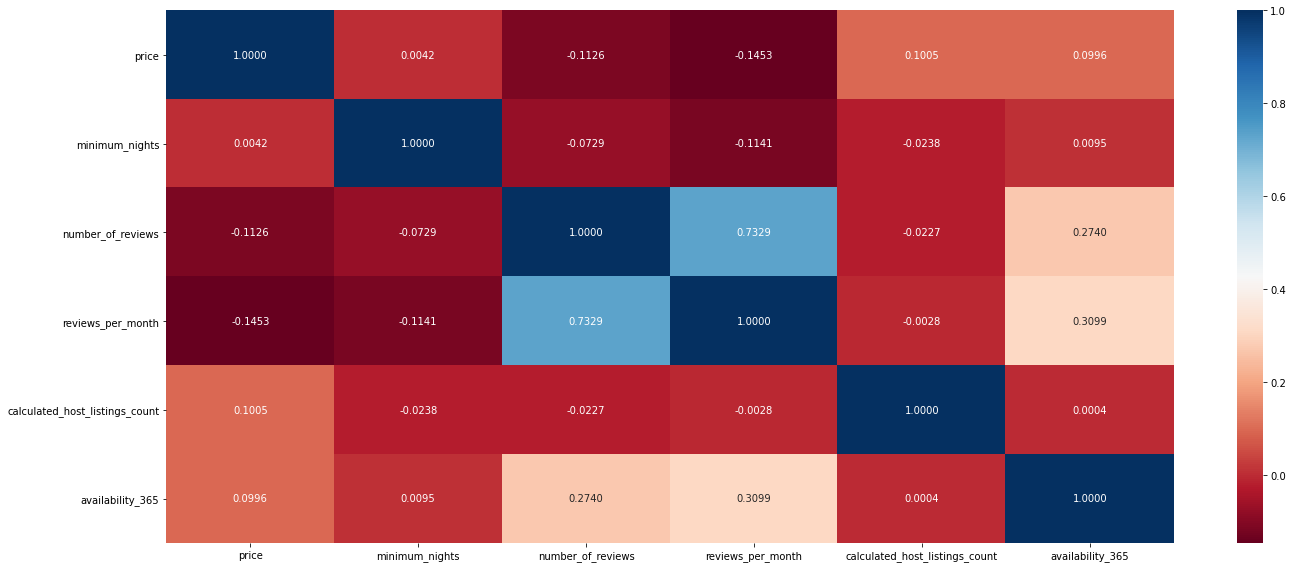

In [37]:
# Plotar um heatmap a partir das correlações entre as variáveis numéricas do DataFrame.

plt.figure(figsize=(20, 8))

sns.heatmap(matriz_correlacao, annot=True, fmt=".4f",  cmap="RdBu")

plt.tight_layout()
plt.show();

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

**Tipos de imóveis disponíveis para aluguel na cidade**

In [38]:
# Mostrar a quantidade de imóveis disponíveis para alugar na cidade por tipo.

print("Tipos de Imóveis Disponíveis para Aluguel\n")
df_clean["room_type"].value_counts()

Tipos de Imóveis Disponíveis para Aluguel



Entire home/apt    14621
Private room        3880
Hotel room           221
Shared room           60
Name: room_type, dtype: int64

O tipo de imóvel com maior disponibilidade para aluguel através do serviço é o **Entire home/apt**, com **14621** unidades cadastradas na cidade.

**Percentual de imóveis disponíveis para aluguel na cidade de acordo com o tipo**

In [39]:
# Apresentar a porcentagem de cada tipo de imóvel disponível

print("Percentual de Imóveis Disponíveis para Aluguel pelo Serviço por Tipo\n")
((df_clean["room_type"].value_counts()/ df_clean.shape[0])*100).apply(lambda x: "{:_.2f}%".format(x))

Percentual de Imóveis Disponíveis para Aluguel pelo Serviço por Tipo



Entire home/apt    77.85%
Private room       20.66%
Hotel room          1.18%
Shared room         0.32%
Name: room_type, dtype: object

### **Q7. Qual a localidade mais cara do dataset?**



**Preço médio do aluguel dos imóveis disponíveis na cidade por bairro**

In [40]:
# Apresentar os preços por bairro [Média].

print("Preço Médio da Diária dos Imóveis Disponíveis para Aluguel pelo Serviço por Bairro\n")
df_clean.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).apply(lambda x: "${:_.2f}".format(x))

Preço Médio da Diária dos Imóveis Disponíveis para Aluguel pelo Serviço por Bairro



neighbourhood
Centrum-West                              $181.11
Centrum-Oost                              $179.57
Zuid                                      $175.21
De Pijp - Rivierenbuurt                   $161.68
IJburg - Zeeburgereiland                  $160.78
Oud-Noord                                 $155.02
De Baarsjes - Oud-West                    $150.20
Westerpark                                $148.99
Watergraafsmeer                           $147.37
Oud-Oost                                  $146.02
Buitenveldert - Zuidas                    $135.76
Oostelijk Havengebied - Indische Buurt    $132.24
De Aker - Nieuw Sloten                    $131.85
Noord-Oost                                $130.04
Bos en Lommer                             $125.92
Noord-West                                $125.23
Slotervaart                               $122.18
Geuzenveld - Slotermeer                   $118.31
Osdorp                                    $109.92
Bijlmer-Oost                        

De acordo com os bairros apresentados, a localidade de ***Centrum-West*** é em média a mais cara para aluguel na cidade, com valor de diárias em torno de ***$181.11.***

**Plot dos imóveis disponíveis para aluguel na cidade por localização**

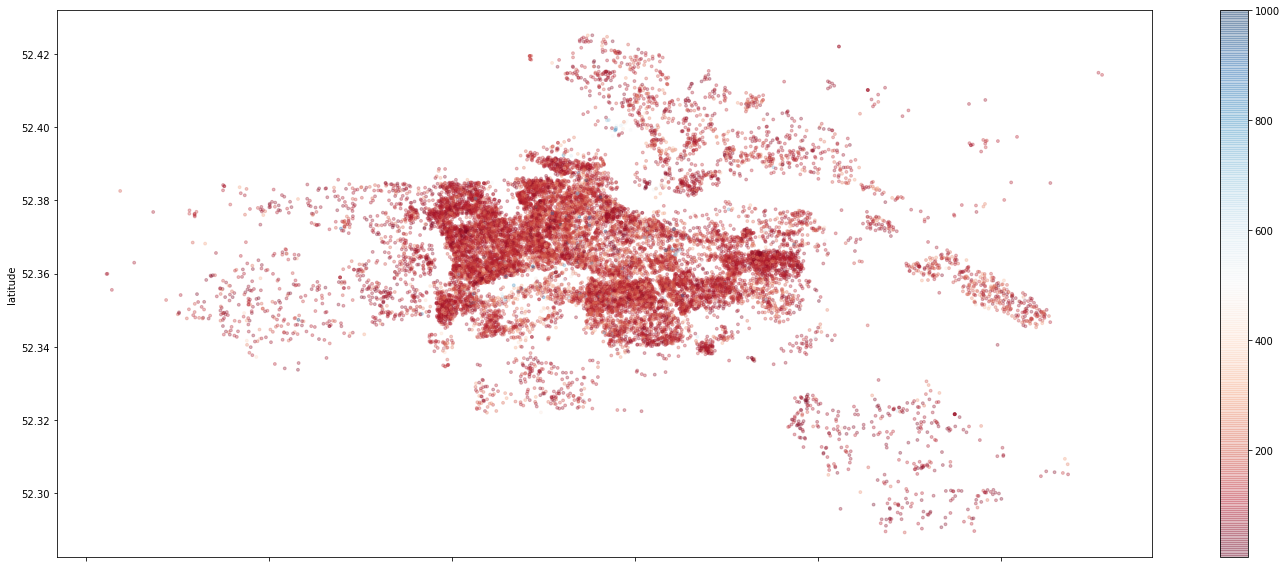

In [41]:
# Plotar a localização dos imóveis disponíveis para aluguel de acordo com latitude-longitude carregadas DataFrame.

df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=.3, c=df_clean["price"], s=8, cmap=plt.get_cmap("RdBu"), figsize=(20, 8))

plt.tight_layout()
plt.show();

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [42]:
# Apresentar a média da variável 'minimum_nights'

print("A média do mínimo de noites para hospedagem dentre os imóveis disponíveis na cidade é de: {:.1f} noites.".format(df_clean["minimum_nights"].mean()))

A média do mínimo de noites para hospedagem dentre os imóveis disponíveis na cidade é de: 3.0 noites.


## Conclusões


Esta análise do perfil dos imóveis disponíveis para aluguel através do serviço Airbnb na cidade de Amsterdam foi realizada a partir de uma base de dados resumida publicada em Setembro/2020 e é focada em imóveis com aluguel mais acessível para quem tem interesse em fazer turismo. 

.

A partir da exploração desses dados, podemos observar que há uma variação considerável de preços das diárias para aluguel dos imóveis na cidade de acordo com a localização. A maior parte dos imóveis disponíveis para aluguel está concentrada na região central, onde certamente existem mais pontos turíticos, locais interesantes/ alternativos, facilidade de locomoção para outras regiões e muita diversão.

.

A maior disponibilidade para aluguel é de imóveis do tipo *Entire home/apt*, com 77.85% dos que estão cadastrados no serviço Airbnb para cidade, tendo valor médio para uma diária de 153.60 (considerar moeda local), considerando que os hóspedes optam em reservar/alugar em média por 3 noites.

.

Para uma análise mais aprofundada do serviço para cidade de Amsterdam, assim como para qualquer outra, o ideal é que seja feita a partir de uma base de dados mais completa, onde se possa buscar melhor detalhamento com apoio das demais variáveis consideradas pelo serviço de hospedagens Airbnb.